# Calories Burnt Analysis and Exercise Recommendation

**Project Objective:**
"The goal of this project is to identify the relationships between various features and their impact on calories burned. Once predictions can be made based on these features, the analysis will be reversed to determine the types of exercises needed to achieve specific calorie-burning goals."
To achieve this, I'll perform a Linear Regression Analysis. Once the dataset has no longer missing values, and outliers has been dealt off, and data has been transformed properly, I'll select the features with enough predictive power to estimate the calories burned based the Pearson corrleation ratio, and making sure that there is no multicollinearity among those features using VIF.

*Dataset source:* https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

## Requirements:

**Libraries:**
* `Numpy` : Mathematical data manipulation
* `Pandas` : EDA
* `Matplotlib` : Graphics
* `Seaborn` : Graphics
* `Sklearn` : For train/test split, scaler, model
* `Statsmodels` : For VIF analysis

## Index

1. Import the relevant libraries and load the data
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model building
5. Results
6. Making predictions with new data
7. Simplifying the model
8. Saving the model and scaler for implementation

### 1. Import the relevant libraries and load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('gym_members_exercise_tracking.csv')
raw_data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
# We start by creating a copy of the given dataset, to maintain an untouched version of our data in case we need it
# We will be doing checkpoints along the script, as a safe way to work.
df = raw_data.copy()

### 2. Exploratory Data Analysis (EDA)

In [4]:
# Since we already know our target is to predict calories burn, we will place this at the end, for a clearer view.
df.columns.values

array(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype=object)

In [5]:
columns_order = ['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Calories_Burned']

df = df[columns_order]

In [6]:
# First, let's find out the DataFrame's shape.
# We see we have 973 rows and 15 columns
df.shape

(973, 15)

In [7]:
# Then, we check our DataFrame to see kind datatypes it contains and check for missing values.
# We can observe that there are mostly numeric data, except for Gender and Workout_type
# And there are no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Workout_Type                   973 non-null    object 
 9   Fat_Percentage                 973 non-null    float64
 10  Water_Intake (liters)          973 non-null    float64
 11  Workout_Frequency (days/week)  973 non-null    int64  
 12  Experience_Level               973 non-null    int

In [8]:
# After, we call .describe() to see some statistical summary, just to get acquainted with the data
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories_Burned
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,24.976773,2.626619,3.321686,1.809866,24.912127,905.422405
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,6.259419,0.600172,0.913047,0.739693,6.660879,272.641516
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,10.000000,1.500000,2.000000,1.000000,12.320000,303.000000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,21.300000,2.200000,3.000000,1.000000,20.110000,720.000000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,26.200000,2.600000,3.000000,2.000000,24.160000,893.000000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,29.300000,3.100000,4.000000,2.000000,28.560000,1076.000000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,35.000000,3.700000,5.000000,3.000000,49.840000,1783.000000


Since we have already seen that there are no missing values in our dataset, we will explore the varaibles for 'Outliers'.<br>
As there is no need to complicate things, a simple boxplot will show us what variables have values that could hurt our model.

<Axes: ylabel='Age'>

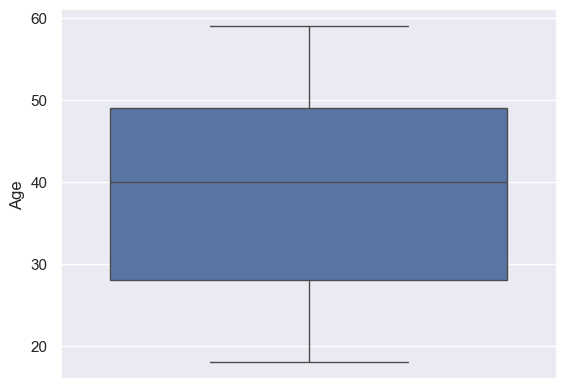

In [9]:
sns.boxplot(df['Age'], orient='v')

<Axes: ylabel='BMI'>

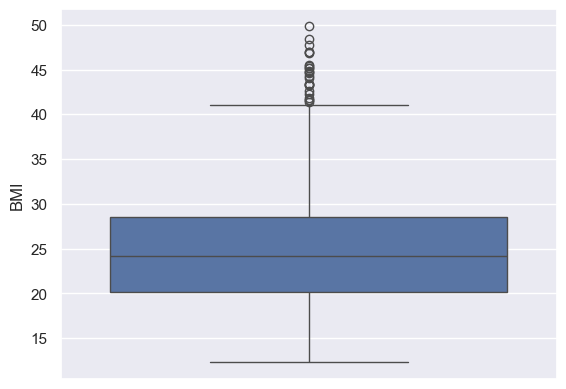

In [10]:
sns.boxplot(df['BMI'], orient='v')

<Axes: ylabel='Session_Duration (hours)'>

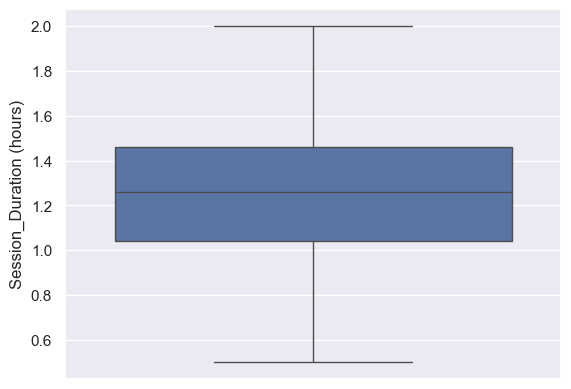

In [11]:
sns.boxplot(df['Session_Duration (hours)'], orient='v') 

<Axes: ylabel='Fat_Percentage'>

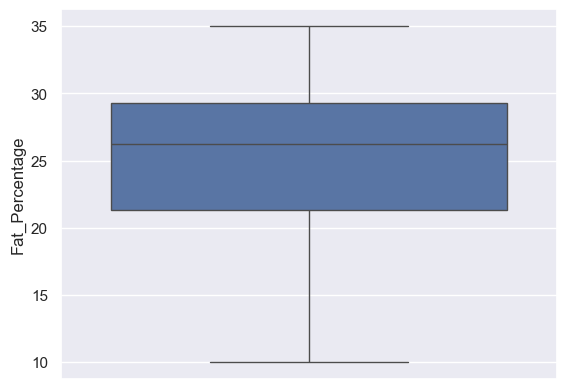

In [12]:
sns.boxplot(df['Fat_Percentage'], orient='v')

<Axes: ylabel='Water_Intake (liters)'>

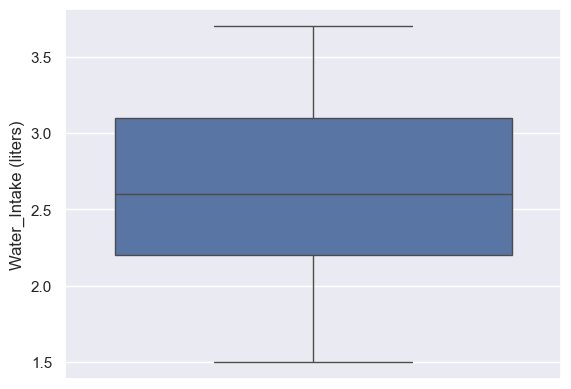

In [13]:
sns.boxplot(df['Water_Intake (liters)'], orient='v')

<Axes: ylabel='Resting_BPM'>

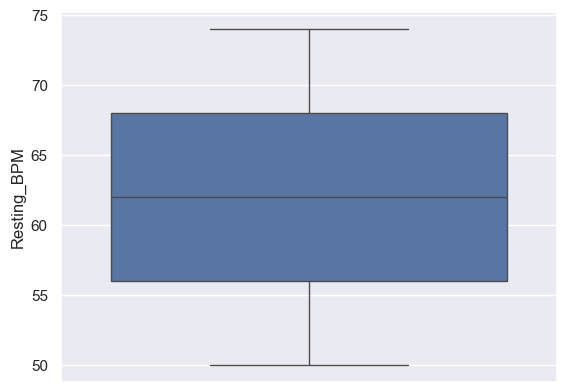

In [14]:
sns.boxplot(df['Resting_BPM'], orient='v')

<Axes: ylabel='Avg_BPM'>

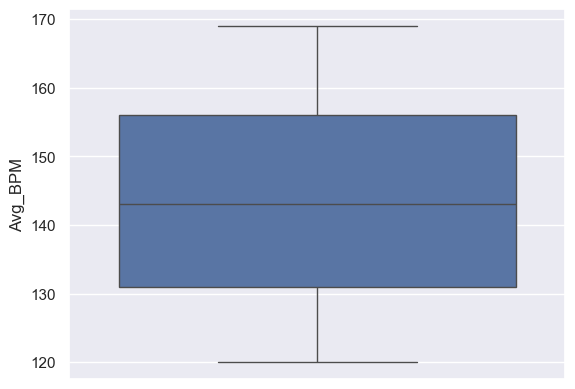

In [15]:
sns.boxplot(df['Avg_BPM'], orient='v')

<Axes: ylabel='Max_BPM'>

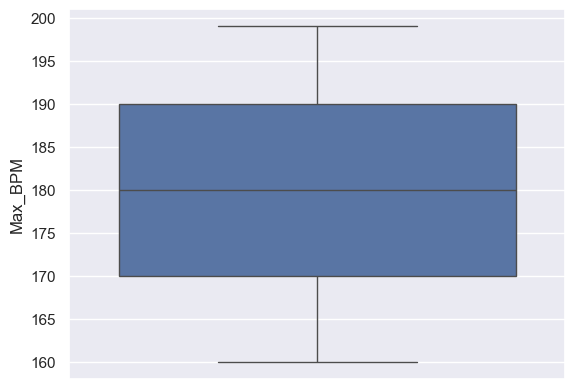

In [16]:
sns.boxplot(df['Max_BPM'], orient='v')

<Axes: ylabel='Calories_Burned'>

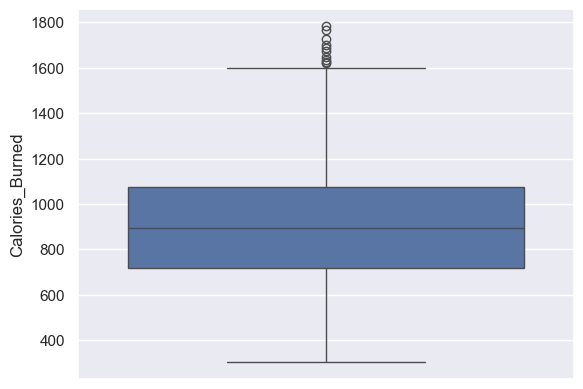

In [17]:
sns.boxplot(df['Calories_Burned'], orient='v')

We can observe that there are two features containing 'Outliers', so now we will explore portion of our data they represent and see how to deal with them

In [18]:
def outlier_detection(data, q1, q3, iqr_multiplier=1.5):
    """
    This function takes a data value, the Quartiles 1 and 3 of the corresponding feature and determines if the given value is
    an Outlier, using the IQR method, returning the corresponding label.
    """
    quality = 'Valid'
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    if data < lower_bound or data > upper_bound:
        quality = 'Outlier'
        return quality
    else:
        return quality

In [19]:
# BMI evaluation

q1_BMI = df['BMI'].quantile(0.25)
q3_BMI = df['BMI'].quantile(0.75)

df['BMI_Label'] = df['BMI'].apply(lambda row: outlier_detection(row, q1_BMI, q3_BMI))


In [20]:
# Calories_Burned evaluation

q1_calories = df['Calories_Burned'].quantile(0.25)
q3_calories = df['Calories_Burned'].quantile(0.75)

df['Calories_Label'] = df['Calories_Burned'].apply(lambda row: outlier_detection(row, q1_calories, q3_calories))

In [21]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories_Burned,BMI_Label,Calories_Label
0,56,Male,88.3,1.71,180,157,60,1.69,Yoga,12.6,3.5,4,3,30.20,1313.0,Valid,Valid
1,46,Female,74.9,1.53,179,151,66,1.30,HIIT,33.9,2.1,4,2,32.00,883.0,Valid,Valid
2,32,Female,68.1,1.66,167,122,54,1.11,Cardio,33.4,2.3,4,2,24.71,677.0,Valid,Valid
3,25,Male,53.2,1.70,190,164,56,0.59,Strength,28.8,2.1,3,1,18.41,532.0,Valid,Valid
4,38,Male,46.1,1.79,188,158,68,0.64,Strength,29.2,2.8,3,1,14.39,556.0,Valid,Valid


In [22]:
df[df['BMI_Label'] == 'Outlier'].count()

Age                              25
Gender                           25
Weight (kg)                      25
Height (m)                       25
Max_BPM                          25
Avg_BPM                          25
Resting_BPM                      25
Session_Duration (hours)         25
Workout_Type                     25
Fat_Percentage                   25
Water_Intake (liters)            25
Workout_Frequency (days/week)    25
Experience_Level                 25
BMI                              25
Calories_Burned                  25
BMI_Label                        25
Calories_Label                   25
dtype: int64

In [23]:
df[df['Calories_Label'] == 'Outlier'].count()

Age                              10
Gender                           10
Weight (kg)                      10
Height (m)                       10
Max_BPM                          10
Avg_BPM                          10
Resting_BPM                      10
Session_Duration (hours)         10
Workout_Type                     10
Fat_Percentage                   10
Water_Intake (liters)            10
Workout_Frequency (days/week)    10
Experience_Level                 10
BMI                              10
Calories_Burned                  10
BMI_Label                        10
Calories_Label                   10
dtype: int64

#### Now that we have determined which values are 'Outliers', we will explore the numerical variables and observe their distribution.

In [24]:
df.columns.values

array(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Workout_Type',
       'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Calories_Burned', 'BMI_Label', 'Calories_Label'], dtype=object)

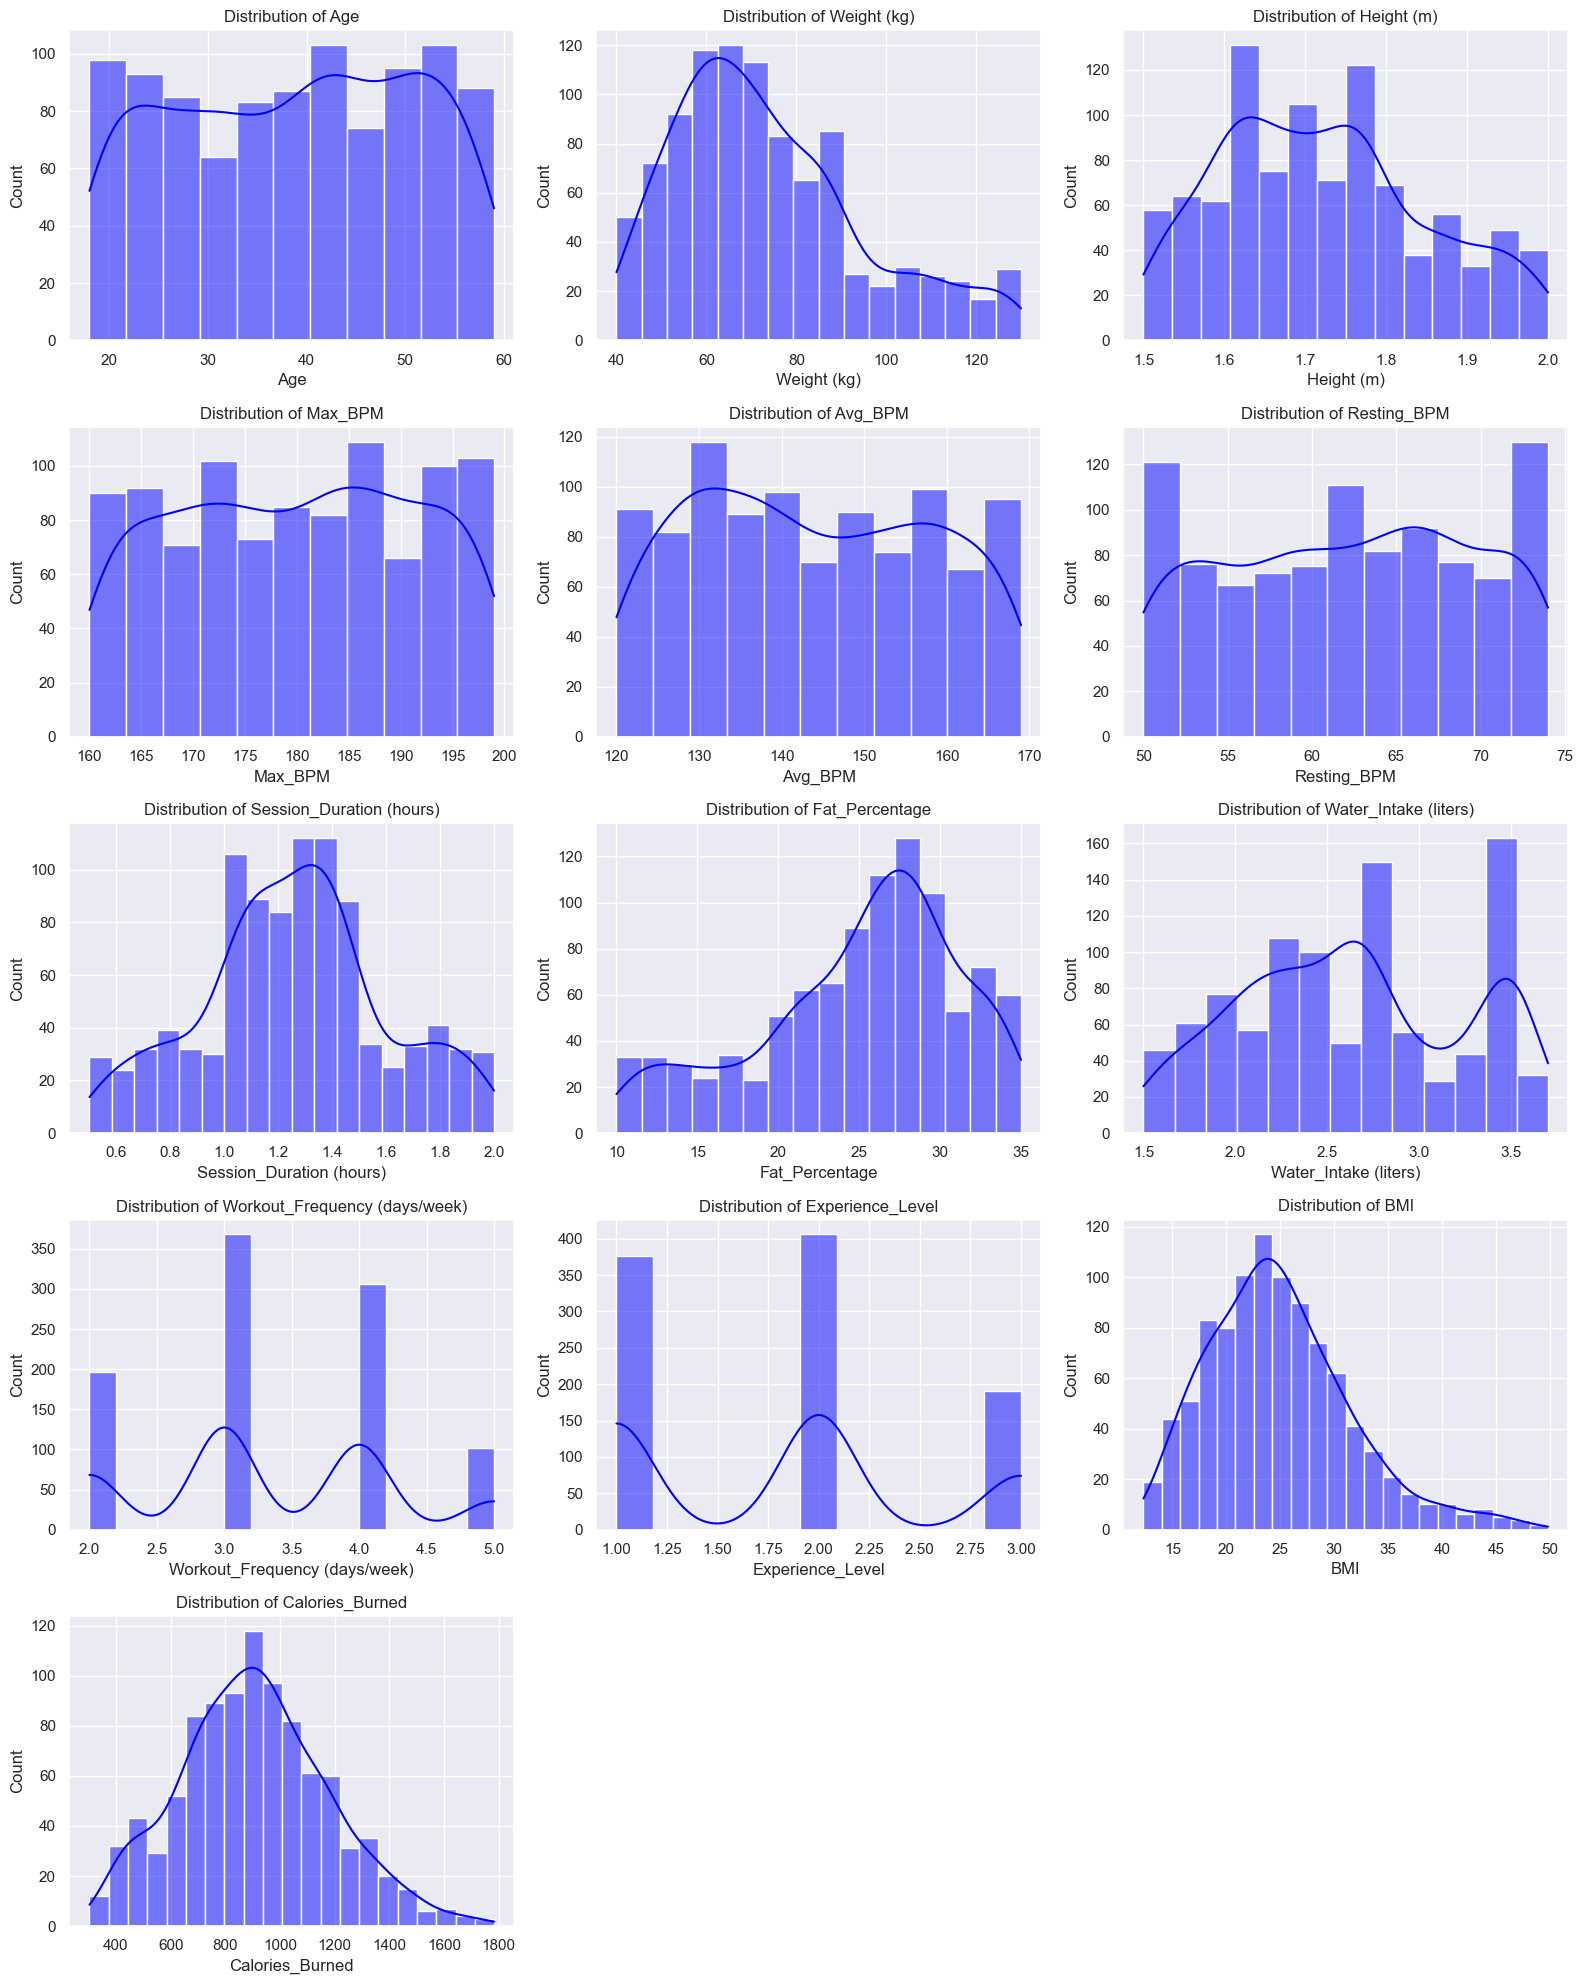

In [25]:
numerical_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Calories_Burned']

plt.figure(figsize=(16,20))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i+1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show() 

### Analysis and Observations of Data Distributions
The distribution of weights is right-skewed, meaning that individuals with higher weights (in our case, above approximately 100 kg) are less common.

Regarding the distribution of body fat percentage, it is left-skewed. This indicates that in our dataset, most individuals have a high body fat percentage, with only a few having between 10% and 20%.

Additionally, many variables exhibit high platykurtosis, making their visualization somewhat challenging. However, most of these variables appear to follow a normal distribution.

Lastly, both Calories_Burned and BMI are normally distributed, except for a slight right skew due to outliers. Since the combined count of these outliers is only 35 observations, I would consider removing them to maintain the normality of the distributions.

### 3. Preprocessing

**Filter the data, leaving outliers out**

In [26]:
df_filtered = df.copy()
df_filtered = df[(df['BMI_Label'] == 'Valid') & (df['Calories_Label'] == 'Valid')]
len(df_filtered)

938

In [27]:
# Now we can drop the columns with the labels since we won't be using them anymore
df_filtered = df_filtered.drop(['BMI_Label', 'Calories_Label'], axis=1)

**We will start transforming the data, so even if it's seems unnecesary, better safe than sorry, we start from another checkpoint**

In [28]:
df_transformed = df_filtered.copy()

In [29]:
# We are going to apply a log transformation to the right-skewed variable 'Weight (kg)'  
# Flattening their fatter tails and normalizing their distribution
# Even though I'm not sure if I will try Weight and Height or simply use BMI (which is a function of both), I'll keep it ready in case i need it

df_transformed['Weight_log'] = df['Weight (kg)'].apply(lambda x: np.log(x + 1))
df_transformed.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories_Burned,Weight_log
0,56,Male,88.3,1.71,180,157,60,1.69,Yoga,12.6,3.5,4,3,30.20,1313.0,4.492001
1,46,Female,74.9,1.53,179,151,66,1.30,HIIT,33.9,2.1,4,2,32.00,883.0,4.329417
2,32,Female,68.1,1.66,167,122,54,1.11,Cardio,33.4,2.3,4,2,24.71,677.0,4.235555
3,25,Male,53.2,1.70,190,164,56,0.59,Strength,28.8,2.1,3,1,18.41,532.0,3.992681
4,38,Male,46.1,1.79,188,158,68,0.64,Strength,29.2,2.8,3,1,14.39,556.0,3.852273


**Categorical Variables**

For the 'Workout_Type' we'll create dummies variables, and for 'Gender' we will use the map function.

In [30]:
# Getting the dummies from Workout_Type in a separte variable which we will concatenate later on
# As we we'll see, Workout_Type = 'Cardio' is the variable dropped, hence, 'Cardio' is our base model.
# This means that Workout_Type values will be in compare to 'Cardio'
# The absence of the other variables: HIIT = 0, Strength = 0, Yoga = 0, represent Cardio = 1

workout_types = pd.get_dummies(df_transformed['Workout_Type'], drop_first=True).astype(int)
workout_types

,HIIT,Strength,Yoga
0,0,0,1
1,1,0,0
2,0,0,0
3,0,1,0
4,0,1,0
...,...,...,...
968,0,1,0
969,0,1,0
970,0,0,0
971,1,0,0


In [31]:
df_transformed = pd.concat([df_transformed, workout_types], axis=1)
df_transformed.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories_Burned,Weight_log,HIIT,Strength,Yoga
0,56,Male,88.3,1.71,180,157,60,1.69,Yoga,12.6,3.5,4,3,30.20,1313.0,4.492001,0,0,1
1,46,Female,74.9,1.53,179,151,66,1.30,HIIT,33.9,2.1,4,2,32.00,883.0,4.329417,1,0,0
2,32,Female,68.1,1.66,167,122,54,1.11,Cardio,33.4,2.3,4,2,24.71,677.0,4.235555,0,0,0
3,25,Male,53.2,1.70,190,164,56,0.59,Strength,28.8,2.1,3,1,18.41,532.0,3.992681,0,1,0
4,38,Male,46.1,1.79,188,158,68,0.64,Strength,29.2,2.8,3,1,14.39,556.0,3.852273,0,1,0


In [32]:
# Now we will map the Gender Column as Male = 0 and Female = 1
df_transformed['Gender_Mapped'] = df_transformed['Gender'].map({'Male': 0, 'Female': 1})

In [33]:
df_transformed = df_transformed.drop(['Gender', 'Workout_Type'], axis=1)
df_transformed.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Calories_Burned,Weight_log,HIIT,Strength,Yoga,Gender_Mapped
0,56,88.3,1.71,180,157,60,1.69,12.6,3.5,4,3,30.20,1313.0,4.492001,0,0,1,0
1,46,74.9,1.53,179,151,66,1.30,33.9,2.1,4,2,32.00,883.0,4.329417,1,0,0,1
2,32,68.1,1.66,167,122,54,1.11,33.4,2.3,4,2,24.71,677.0,4.235555,0,0,0,1
3,25,53.2,1.70,190,164,56,0.59,28.8,2.1,3,1,18.41,532.0,3.992681,0,1,0,0
4,38,46.1,1.79,188,158,68,0.64,29.2,2.8,3,1,14.39,556.0,3.852273,0,1,0,0


In [34]:
df_transformed.columns.values

array(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Calories_Burned', 'Weight_log', 'HIIT',
       'Strength', 'Yoga', 'Gender_Mapped'], dtype=object)

In [35]:
columns_ordered = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Weight_log', 'HIIT',
       'Strength', 'Yoga', 'Gender_Mapped', 'Calories_Burned']

df_transformed = df_transformed[columns_ordered]

In [36]:
df_preprocessed = df_transformed.copy()

**Correlation Heatmap**<br><br>
Now that are data has been preprocessed and is ready for analysis, before jumping into the model building section, we well visualize the correlation between the different variables.<br>
Specially the correlation with the one we will be trying to predict: *Calories_Burned*

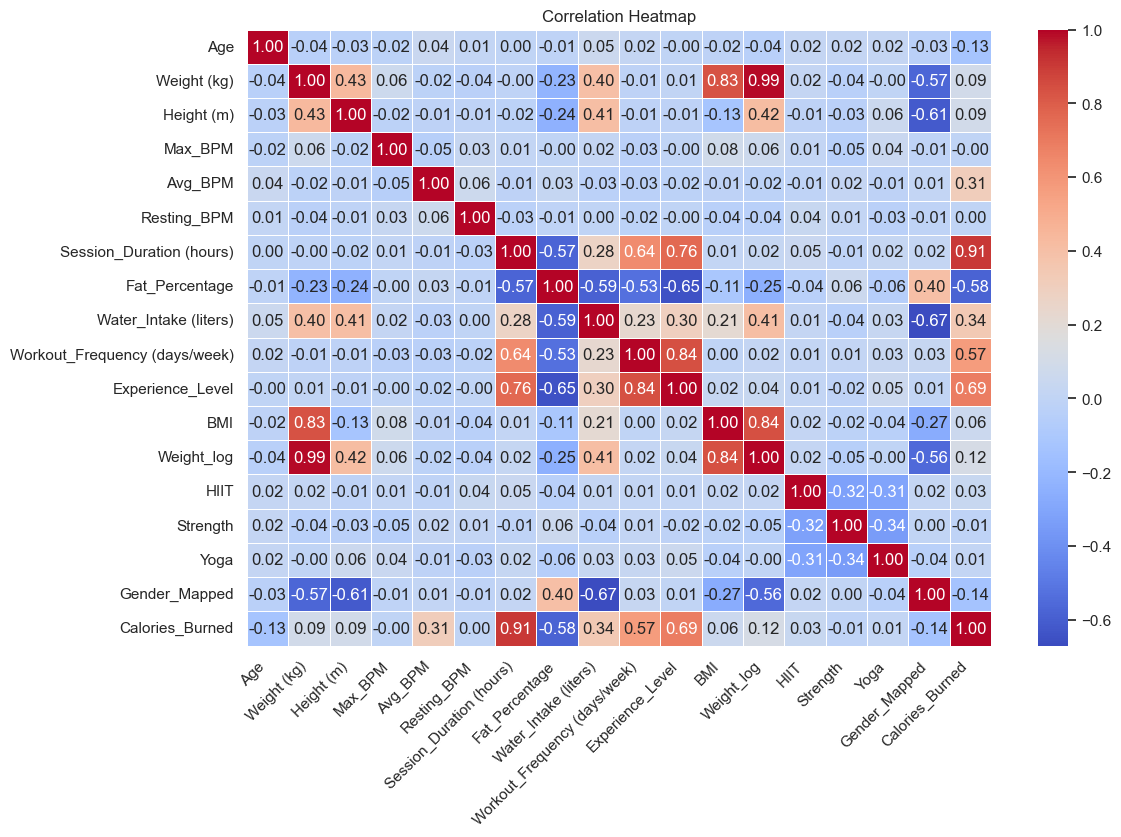

In [37]:
correlation_matrix = df_preprocessed.corr(method='pearson')

plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

We can observe that the main predictor is Session_duration, followed by Experience_Level, then Fat_Percentage along with Workout_Frequency, and finally Water_Intake and AVG_BPM. Then the rest of the features have more impact than others, but overall smaller compared with the main ones.<br>
I'll perform the analysis based on the features that has at least abs[0.1] correlation with Calories_Burned, and disregard the rest. (except for the Workout_Types)<br>

Let's dive into this for a bit:

* **Session_Duration:** It is only logical that the longer one train, the more calories that person will burn.
* **Experience level:** allows members to perform more complex exercises, also to combine exercises that provides a better performance in their body, hence, using more energy.
* **Fat_Percentage:** it's a known fact that muscle helps in burning fat, then, we can expect the opposite to be true too. The more Fat_Percentage a person has, harder is to burn calories, although the first loss may happen easily, then long term can be harder (**Note**: This is not a reason for not exercising, quite the opposite, the sooner one starts, the sooner the results. Working out is fun and healthy for both physically and mentally!)
* **Workout_Frequency:** Nothing beyond logic here either. The more we work out, the more calories we burn.
* **Water_Intake:** If we search for ANY diet or recommendation for losing weight, we will see **DRINK LOTS OF WATER!**. So it's known, more Water_Intake, weight loss.
* **AVG_BPM:** In general, a high BPM during the workout translates into a higher caloric expenditure, since the body is working intensively.
* **Weight_Log:** This feature presents a positive correlation between the exponential weight of a person and the calories that she or he burns during workout.
* **Age**: There is a negative correlation with Calories Burned, which is logical to expect that as a person gets older, it's harder to burn calories due to the differences in workout capabilities.
* **Gender Mapped**: This could mean that man may be able to perform more intense workouts, such as heavier weights lifting, resulting in higher amount of calories burned (this is based on the fact that in the mapped feature: Man = 0, Female = 1, if it was the other way around, the correlation coefficient would be positive)


Then, a final note: It is important to stress that this is a premature analysis based on a personal trajectory in the fitness world. The representations that the model may arise could differ from these starting insights.

In [38]:
# We will select the features as mentioned before

columns_to_drop = ['Weight (kg)', 'Height (m)', 'Max_BPM', 'Resting_BPM', 'BMI']

df_preprocessed = df_preprocessed.drop(columns_to_drop, axis=1)

data_analyse = df_preprocessed.copy()
data_analyse.head()

,Age,Avg_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,Weight_log,HIIT,Strength,Yoga,Gender_Mapped,Calories_Burned
0,56,157,1.69,12.6,3.5,4,3,4.492001,0,0,1,0,1313.0
1,46,151,1.30,33.9,2.1,4,2,4.329417,1,0,0,1,883.0
2,32,122,1.11,33.4,2.3,4,2,4.235555,0,0,0,1,677.0
3,25,164,0.59,28.8,2.1,3,1,3.992681,0,1,0,0,532.0
4,38,158,0.64,29.2,2.8,3,1,3.852273,0,1,0,0,556.0


In [39]:
columns_ordered = ['Age', 'Avg_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Weight_log',
       'Experience_Level', 'HIIT', 'Strength', 'Yoga',
       'Gender_Mapped', 'Calories_Burned']
data_analyse = data_analyse[columns_ordered]

### Multicollinearity Analysis - VIF
    
Before jumping into spliting our data, we will perform VIF using the `statsmodels.stats.outliers_influence` module.
<br>The Variance Inflation Factor (VIF) takes each of our features, and uses it as the dependent variable, trying to fit a regression with the remaining features.<br><br>
VIF = 1 / 1 - R^2.<br><br>
Basically, if the R^2 of each regression is low, the denominator will be low, which means we cannot explain the dependent variable using the rest of the features. This means there's little correlation between them.<br>
Analogically, if the R^2 is high, the relationship will be also high, meaning that the dependent variable is explained but the other features. This translates into Multicollinearity, which we want to avoid.

In [40]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler

In [41]:
# For VIF to work properly, we need to scale our data.
# Having big differences in scales can result in ginormous VIF.
# We transform the whole DataFrame into dtype=Float to avoid Panda's error managing the datatypes before transforming

data_analyse = data_analyse.astype(float)

scaler = StandardScaler()

#inputs_to_scale = data_analyse.iloc[:, :7]
data_analyse.iloc[:, :7] = scaler.fit_transform(data_analyse.iloc[:, :7])
data_analyse

,Age,Avg_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Weight_log,Experience_Level,HIIT,Strength,Yoga,Gender_Mapped,Calories_Burned
0,1.417626,0.947381,1.288071,-2.020429,1.478195,0.753742,0.873173,3.0,0.0,0.0,1.0,0.0,1313.0
1,0.594873,0.527880,0.140477,1.412632,-0.855498,0.753742,0.256713,2.0,1.0,0.0,0.0,1.0,883.0
2,-0.556981,-1.499709,-0.418608,1.332044,-0.522113,0.753742,-0.099176,2.0,0.0,0.0,0.0,1.0,677.0
3,-1.132908,1.436799,-1.948733,0.590631,-0.855498,-0.340700,-1.020062,1.0,0.0,1.0,0.0,0.0,532.0
4,-0.063329,1.017298,-1.801606,0.655102,0.311349,-0.340700,-1.552436,1.0,0.0,1.0,0.0,0.0,556.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.215184,1.017298,0.934965,-2.439488,1.478195,0.753742,0.821876,3.0,0.0,1.0,0.0,0.0,1364.0
969,-1.132908,1.576632,0.375881,-0.021840,0.644733,-1.435142,-0.182390,1.0,0.0,1.0,0.0,0.0,1260.0
970,1.664452,-1.639543,1.376348,-1.021134,0.144656,1.848183,-0.547137,3.0,0.0,0.0,0.0,1.0,929.0
971,-0.556981,0.178295,-0.448033,0.493925,-0.855498,-0.340700,2.220451,2.0,1.0,0.0,0.0,0.0,883.0


In [42]:
variables = data_analyse.iloc[:, :-1]
variables = sm.add_constant(variables)

vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['VIF'] = [VIF(variables.values, i) for i in range(variables.shape[1])]
vif.sort_values('VIF', ascending=False)

,Features,VIF
0,const,35.870020
8,Experience_Level,5.356096
6,Workout_Frequency (days/week),3.376518
4,Fat_Percentage,2.721990
12,Gender_Mapped,2.607001
3,Session_Duration (hours),2.493512
5,Water_Intake (liters),2.392452
10,Strength,1.497230
11,Yoga,1.479208
7,Weight_log,1.476713


An acceptable VIF is ~1-5. There is only 1 feature being slightly higher than that. (Is not unusual that the bias has a high VIF)
So we can confidently say that there are no multicollinearity to deal with.

### 4. Model Building

#### Data Preparation

**Train Test Split**

In [43]:
X = data_analyse.drop('Calories_Burned', axis=1)
y = data_analyse['Calories_Burned']

In [44]:
X

,Age,Avg_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Weight_log,Experience_Level,HIIT,Strength,Yoga,Gender_Mapped
0,1.417626,0.947381,1.288071,-2.020429,1.478195,0.753742,0.873173,3.0,0.0,0.0,1.0,0.0
1,0.594873,0.527880,0.140477,1.412632,-0.855498,0.753742,0.256713,2.0,1.0,0.0,0.0,1.0
2,-0.556981,-1.499709,-0.418608,1.332044,-0.522113,0.753742,-0.099176,2.0,0.0,0.0,0.0,1.0
3,-1.132908,1.436799,-1.948733,0.590631,-0.855498,-0.340700,-1.020062,1.0,0.0,1.0,0.0,0.0
4,-0.063329,1.017298,-1.801606,0.655102,0.311349,-0.340700,-1.552436,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.215184,1.017298,0.934965,-2.439488,1.478195,0.753742,0.821876,3.0,0.0,1.0,0.0,0.0
969,-1.132908,1.576632,0.375881,-0.021840,0.644733,-1.435142,-0.182390,1.0,0.0,1.0,0.0,0.0
970,1.664452,-1.639543,1.376348,-1.021134,0.144656,1.848183,-0.547137,3.0,0.0,0.0,0.0,1.0
971,-0.556981,0.178295,-0.448033,0.493925,-0.855498,-0.340700,2.220451,2.0,1.0,0.0,0.0,0.0


In [45]:
y

0      1313.0
1       883.0
2       677.0
3       532.0
4       556.0
        ...  
968    1364.0
969    1260.0
970     929.0
971     883.0
972     542.0
Name: Calories_Burned, Length: 938, dtype: float64

In [46]:
# Now that we have our Inputs (X) and Outputs(y), we split the data into training and testing sets
# Our model will learn from the training set.
# Then, we will use the test set (data our model has never seen) to evaluate its performance.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Create an instance of the LinearRegression Class
model = LinearRegression()

# Fit the training inputs and targets
model.fit(X_train, y_train)

LinearRegression()

#### Metrics

Here we will observe some metrics that allow to evaluate the model's predictions.

**Mean Squared Error (MSE)**: This metrics evaluates the average cuadratic error between the predictions of the models and the actual targets.

**Root Mean Squared Error (RMSE)**: It's the squared root of the metric mentioned above. This provides a simpler interpretability as this value is in the same scale as the targets. (Calories burned)

**$R^2$:** This metric evaluates 'how much' of the target variable's behavior can be explained by the model. The closer this metric is to 1, the better the model is able to explain the patterns in the data.

In [49]:
# Model's predictions
y_hat = model.predict(X_test)

# MSE
mse = mean_squared_error(y_hat, y_test)

# RMSE
sqrt_mse = np.sqrt(mse)

# R^2
r2 = r2_score(y_hat, y_test)

# Round the values for better readability
mse = np.round(mse, 4)
sqrt_mse = np.round(sqrt_mse, 4)
r2 = np.round(r2, 4)

# Print the results
print(f'The Mean Squared Error (MSE): {mse}')
print(f'The Root Mean Squared Error (MSE): {sqrt_mse}')
print(f'The R2 Score: {r2}')

The Mean Squared Error (MSE): 1032.6922
The Root Mean Squared Error (MSE): 32.1355
The R2 Score: 0.9863


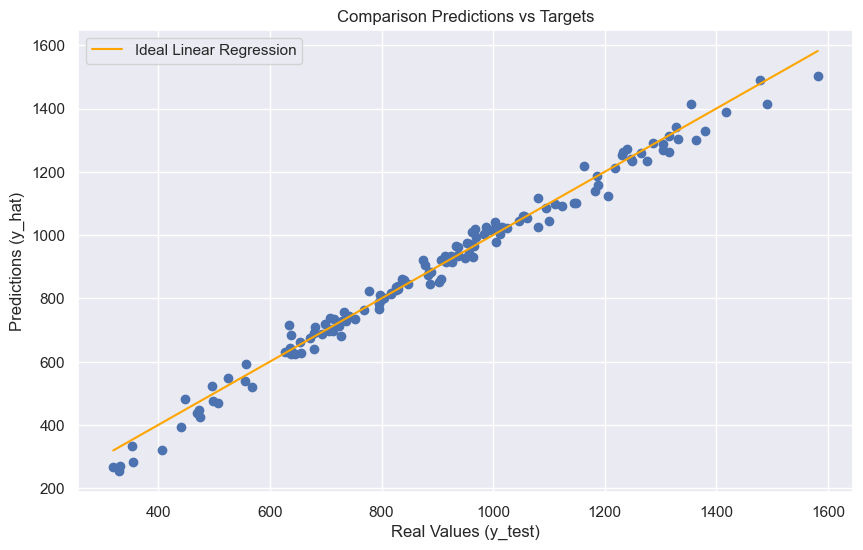

In [50]:
plt.figure(figsize=(10, 6))

# Create a scatter plot between predictions and real values
plt.scatter(y_test, y_hat, color='b')

# Add indentity line (ideally: y_hat = y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='orange', linestyle='-', label='Ideal Linear Regression')


plt.title('Comparison Predictions vs Targets')
plt.xlabel('Real Values (y_test)')
plt.ylabel('Predictions (y_hat)')
plt.legend()
plt.show()

We can observe that the model has capture the underlying patterns in the data quite well

### 5. Results

In [51]:
model.coef_

array([-39.85729669,  87.99274373, 241.34043868,  -0.77329998,
        -1.66537429,   0.98940678,   2.24610515,  -1.35515946,
        -4.09226804,  -5.6727531 ,  -6.24623099, -87.02826869])

In [52]:
df_coef = pd.DataFrame()
df_coef['Feature'] = X.columns.values
df_coef['Coefficient'] = model.coef_.T
df_coef.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
2,Session_Duration (hours),241.340439
1,Avg_BPM,87.992744
6,Weight_log,2.246105
5,Workout_Frequency (days/week),0.989407
3,Fat_Percentage,-0.773300
7,Experience_Level,-1.355159
4,Water_Intake (liters),-1.665374
8,HIIT,-4.092268
9,Strength,-5.672753
10,Yoga,-6.246231


#### Coefficients interpretation:

Since our data is scaled, the coefficients will be measured in standard deviation's unit for the given feature.
Here, the checkpoints come in handy. I'll take the DataFrame once it was preprocessed but before being scaled, and create a DataFrame with the coefficientes and the Standard Deviations of each feature before scaling, so we can intepret the results.

In [53]:
# Data statistics before scaling
df_for_stdv = df_preprocessed.copy()
df_for_stdv = df_for_stdv.drop('Calories_Burned', axis=1)
df_for_stdv.describe()

,Age,Avg_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,Weight_log,HIIT,Strength,Yoga,Gender_Mapped
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,38.769723,143.449893,1.252260,25.135501,2.613220,3.311301,1.800640,4.261711,0.224947,0.265458,0.247335,0.491471
std,12.160798,14.310333,0.340023,6.207685,0.600228,0.914195,0.739003,0.263880,0.417770,0.441813,0.431693,0.500194
min,18.000000,120.000000,0.500000,10.000000,1.500000,2.000000,1.000000,3.713572,0.000000,0.000000,0.000000,0.000000
25%,28.000000,131.000000,1.040000,21.300000,2.100000,3.000000,1.000000,4.074567,0.000000,0.000000,0.000000,0.000000
50%,40.000000,143.000000,1.260000,26.400000,2.600000,3.000000,2.000000,4.249209,0.000000,0.000000,0.000000,0.000000
75%,50.000000,156.000000,1.450000,29.400000,3.100000,4.000000,2.000000,4.448808,0.000000,1.000000,0.000000,1.000000
max,59.000000,169.000000,1.990000,35.000000,3.700000,5.000000,3.000000,4.871373,1.000000,1.000000,1.000000,1.000000


In [54]:
std_devs = df_for_stdv.describe().loc['std']
std_devs.index

Index(['Age', 'Avg_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'Weight_log', 'HIIT', 'Strength', 'Yoga',
       'Gender_Mapped'],
      dtype='object')

In [55]:
df_std_devs = pd.DataFrame()
df_std_devs['Feature'] = std_devs.index
df_std_devs['Std_Dev'] = std_devs.values
df_std_devs

,Feature,Std_Dev
0,Age,12.160798
1,Avg_BPM,14.310333
2,Session_Duration (hours),0.340023
3,Fat_Percentage,6.207685
4,Water_Intake (liters),0.600228
5,Workout_Frequency (days/week),0.914195
6,Experience_Level,0.739003
7,Weight_log,0.263880
8,HIIT,0.417770
9,Strength,0.441813


In [56]:
df_coef_stdev = df_coef.copy()
df_coef_stdev = pd.merge(df_coef_stdev, df_std_devs, on='Feature')
df_coef_stdev.sort_values('Coefficient', ascending=False)

,Feature,Coefficient,Std_Dev
2,Session_Duration (hours),241.340439,0.340023
1,Avg_BPM,87.992744,14.310333
6,Weight_log,2.246105,0.263880
5,Workout_Frequency (days/week),0.989407,0.914195
3,Fat_Percentage,-0.773300,6.207685
7,Experience_Level,-1.355159,0.739003
4,Water_Intake (liters),-1.665374,0.600228
8,HIIT,-4.092268,0.417770
9,Strength,-5.672753,0.441813
10,Yoga,-6.246231,0.431693


#### Now lets interpret de results:

* **Numerical Variables**

***Session_Duration (hours):*** This is interpreted as, for about 20 minutes workout (0.34 * 60 minutes), we expect a person to burn aproximately 241 calories. This is a relatively high amount, so we can expect that subjects of the study perform intense workouts.

***Avg_BPM:*** Represents that a unit change on the standard deviation of Avg_BPM cardio rate (14 units of Avg_BPM), that person is expected to burn around 88 more calories. Supporting the correlation analysis.

***Weight_log:***: 
An increase in one unit of the logarithm of weight (reflecting a proportional change in original weight) results in 2 additional calories burned. Hence, according to the model, the weight of a person has relatively little impact in the calories burned during workout.

***Workout_Frequency:*** This seems a bit counterintuitive. The coefficient says that for 1 extra workout day per week, we can expect a person to burn 1 more calory. This could be due to thefact that  session duratio is not represented in this feature:s a person could work out 5 times a week for 30 minutes, and another one 4 times a week for 1.5 hours. Resultingon the latter hav igna highere amoun oft workout even attending to the Gym e les times per week.

***Fat_Percentage:*** As mentioned in the correlation analysis, having more muscle requires more energy to keep them active, resulting in a negative impact on the amount of calories burned if a person has higher fat percentage.

***Water_Intake:*** Even if at first I said "more water, more weight loss", calories burned is not the same concept of weight loss. So this may sound counterintuitive too. A possible explanation could be that in our dataset, people who drink more water are aligned with less intense workouts, such as Yoga.

***Age***: As expected, younger individuals may present a higher resistance and strenght, nothing we woulnd't expect. But it's important to point out that there are many exceptions regarding this conclusion.


* **Categorical Variables**

***Experience_level:*** The coefficient contradcits what was expected. This may be due to the fact that a more experienced person would have better technique, resulting in more efficients workouts and resulting in a less caloric expenditure for a similar effort perceibed.

***Gender_Mapped***: Aligned with the correlation analysis, the coefficient shows that it's possible that man can burn higher amount of calories due to capabilities of performing more intense workouts, lifting heavier weights, or having more physical resistance. *I want be clear that this conclusion is only based on the current dataset, so the generalizations comes from representations found in it.*

***HIIT - Strenght - Yoga:*** This coefficientes are based on the omittedWorkout_Type: *'Cardio'*. What they represent is that for a *'HIIT'*, *'Strenght'* or *'Yoga'* session, a person is expected to burn less calories than in a *'Cardio'* session.

### 6. Making predictions with the model

In [57]:
X.columns.values

array(['Age', 'Avg_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Weight_log', 'Experience_Level', 'HIIT', 'Strength', 'Yoga',
       'Gender_Mapped'], dtype=object)

In [58]:
import math 
input = np.array([32, 160, 1.5, 20, 3.5, 5, math.log(80), 3, 0, 1, 0, 0]).reshape(-1, 1)
input_scaled = scaler.fit_transform(input)

In [59]:
to_predict = pd.DataFrame(input_scaled.T, columns=X.columns.values)
to_predict

,Age,Avg_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Weight_log,Experience_Level,HIIT,Strength,Yoga,Gender_Mapped
0,0.294529,3.239477,-0.407197,0.01844,-0.361182,-0.326671,-0.340889,-0.372685,-0.441708,-0.4187,-0.441708,-0.441708


In [60]:
model.predict(to_predict)

array([1165.99693829])

In [61]:
new_input = np.array([33, 160, 1.5, 15, 3, 4, math.log(78), 3, 0, 1, 0, 0]).reshape(-1, 1)
new_input_scaled = scaler.fit_transform(new_input)
to_predict = pd.DataFrame(new_input_scaled.T, columns=X.columns.values)
to_predict

,Age,Avg_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Weight_log,Experience_Level,HIIT,Strength,Yoga,Gender_Mapped
0,0.327501,3.243842,-0.395843,-0.085838,-0.361398,-0.338435,-0.330243,-0.361398,-0.430288,-0.407325,-0.430288,-0.430288


In [62]:
model.predict(to_predict)

array([1166.70848146])

### 7. Simplifying the model

Since Fat Percentage and Workout_Frequency provide little predictive power to our model, I'll remove it for simplicity.<br>
A simple model = Better model

In [63]:
X1 = data_analyse.drop(['Calories_Burned', 'Fat_Percentage', 'Workout_Frequency (days/week)'], axis=1)
y1 = data_analyse['Calories_Burned']

In [64]:
#from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.15, random_state=42)

In [65]:
# Create an instance of the LinearRegression Class
model_1 = LinearRegression()

# Fit the training inputs and targets
model_1.fit(X_train1, y_train1)

LinearRegression()

In [66]:
y_hat1 = model_1.predict(X_test1)

mse1 = mean_squared_error(y_hat1, y_test1)

sqrt_mse1 = np.sqrt(mse1)

r2_1 = r2_score(y_hat1, y_test1)


mse1 = np.round(mse1, 4)
sqrt_mse1 = np.round(sqrt_mse1, 4)
r2_1 = np.round(r2_1, 4)

print(f'The Mean Squared Error (MSE): {mse1}')
print(f'The Root Mean Squared Error (MSE): {sqrt_mse1}')
print(f'The R2 Score: {r2_1}')

The Mean Squared Error (MSE): 1034.918
The Root Mean Squared Error (MSE): 32.1701
The R2 Score: 0.9862


In [67]:
model_1.coef_

array([-39.84180479,  87.97758086, 241.46508923,  -1.4932672 ,
         2.23729676,   0.2434613 ,  -4.01679097,  -5.60664327,
        -6.21899191, -87.38360839])

In [68]:
df_coef1 = pd.DataFrame()
df_coef1['Feature'] = X1.columns.values
df_coef1['Coefficient'] = model_1.coef_.T
df_coef1.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
2,Session_Duration (hours),241.465089
1,Avg_BPM,87.977581
4,Weight_log,2.237297
5,Experience_Level,0.243461
3,Water_Intake (liters),-1.493267
6,HIIT,-4.016791
7,Strength,-5.606643
8,Yoga,-6.218992
0,Age,-39.841805
9,Gender_Mapped,-87.383608


#### 7.1 Observations

We can observe that we lost no predictive power, reducing the model by 2 variables.<br>
Now, the results suggest that we could also remove Experience_Level from our model, since it has almost no impact in the model's inferences. 

In [69]:
X2 = data_analyse.drop(['Calories_Burned', 'Fat_Percentage', 'Workout_Frequency (days/week)', 'Experience_Level'], axis=1)
y2 = data_analyse['Calories_Burned']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.15, random_state=42)

# Create an instance of the LinearRegression Class
model_2 = LinearRegression()

# Fit the training inputs and targets
model_2.fit(X_train2, y_train2)

LinearRegression()

In [70]:
y_hat2 = model_2.predict(X_test2)

mse2 = mean_squared_error(y_hat2, y_test2)

sqrt_mse2 = np.sqrt(mse2)

r2_2 = r2_score(y_hat2, y_test2)


mse2 = np.round(mse2, 4)
sqrt_mse2 = np.round(sqrt_mse2, 4)
r2_2 = np.round(r2_2, 4)

print(f'The Mean Squared Error (MSE): {mse2}')
print(f'The Root Mean Squared Error (MSE): {sqrt_mse2}')
print(f'The R2 Score: {r2_2}')

The Mean Squared Error (MSE): 1035.5174
The Root Mean Squared Error (MSE): 32.1795
The R2 Score: 0.9862


In [71]:
df_coef2 = pd.DataFrame()
df_coef2['Feature'] = X2.columns.values
df_coef2['Coefficient'] = model_2.coef_.T
df_coef2.sort_values('Coefficient', ascending=False)

,Feature,Coefficient
2,Session_Duration (hours),241.593041
1,Avg_BPM,87.973881
4,Weight_log,2.237170
3,Water_Intake (liters),-1.464539
5,HIIT,-4.026965
6,Strength,-5.609441
7,Yoga,-6.209224
0,Age,-39.843391
8,Gender_Mapped,-87.344229


In [72]:
df_std_devs2 = df_std_devs.drop(index=[5, 3, 7], axis=0)
df_coef_stdv2 = pd.merge(df_coef2, df_std_devs2, on='Feature')
df_coef_stdv2.sort_values('Coefficient', ascending=False)

,Feature,Coefficient,Std_Dev
2,Session_Duration (hours),241.593041,0.340023
1,Avg_BPM,87.973881,14.310333
3,Water_Intake (liters),-1.464539,0.600228
4,HIIT,-4.026965,0.417770
5,Strength,-5.609441,0.441813
6,Yoga,-6.209224,0.431693
0,Age,-39.843391,12.160798
7,Gender_Mapped,-87.344229,0.500194


#### 7.2 Conclusions

These are the variables of our final model, as we observed that eliminating 3 variables we lost no predictive power but gain simplicity.
This dimentionallity reduction can provide a easier application for the final user, needing less information to complete to obtain almost the same results.<br>
So the model we will save for implementing is `model_2`

### 8. Saving the model for further implementation

In [73]:
# I'll prepare a scaler with the final features so it can be implemented later on

scaler_2 = StandardScaler()
data_analyse2 = df_preprocessed.copy()
data_analyse2 = data_analyse2[columns_ordered]
data_analyse2 = data_analyse2.drop(['Experience_Level', 'Fat_Percentage', 'Workout_Frequency (days/week)'], axis=1)

data_analyse2 = data_analyse2.astype(float)

data_analyse2.iloc[:, :5] = scaler_2.fit_transform(data_analyse2.iloc[:, :5])
data_analyse2


,Age,Avg_BPM,Session_Duration (hours),Water_Intake (liters),Weight_log,HIIT,Strength,Yoga,Gender_Mapped,Calories_Burned
0,1.417626,0.947381,1.288071,1.478195,0.873173,0.0,0.0,1.0,0.0,1313.0
1,0.594873,0.527880,0.140477,-0.855498,0.256713,1.0,0.0,0.0,1.0,883.0
2,-0.556981,-1.499709,-0.418608,-0.522113,-0.099176,0.0,0.0,0.0,1.0,677.0
3,-1.132908,1.436799,-1.948733,-0.855498,-1.020062,0.0,1.0,0.0,0.0,532.0
4,-0.063329,1.017298,-1.801606,0.311349,-1.552436,0.0,1.0,0.0,0.0,556.0
...,...,...,...,...,...,...,...,...,...,...
968,-1.215184,1.017298,0.934965,1.478195,0.821876,0.0,1.0,0.0,0.0,1364.0
969,-1.132908,1.576632,0.375881,0.644733,-0.182390,0.0,1.0,0.0,0.0,1260.0
970,1.664452,-1.639543,1.376348,0.144656,-0.547137,0.0,0.0,0.0,1.0,929.0
971,-0.556981,0.178295,-0.448033,-0.855498,2.220451,1.0,0.0,0.0,0.0,883.0


In [74]:
from pathlib import Path
import joblib

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'model_calories.joblib'

MODEL_PATH_SAVE = MODEL_PATH / MODEL_NAME

joblib.dump(model_2, MODEL_PATH_SAVE)
print(f'Model has been saved in: {MODEL_PATH_SAVE}')

Model has been saved in: models\model_calories.joblib


In [75]:
#Scaler

SCALER_PATH = MODEL_PATH
SCALER_NAME = 'scaler_calories.joblib'

SCALER_PATH_SAVE = SCALER_PATH / SCALER_NAME

joblib.dump(scaler_2, SCALER_PATH_SAVE)
print(f'Scaler has been saved in: {SCALER_PATH_SAVE}')

Scaler has been saved in: models\scaler_calories.joblib
